# Обобщения ортогональных функций и полиномов Чебышева-Лагерра

В [9] разработан метод определения передаточных функций линейных динамических систем, который основан на взятии преобразований Лапласа от входных и выходных сигналов. В качестве основы для определения спектральной плотности используем указанный метод. При этом в качестве ортогональных функций, по которым раскладывается корреляционная функция $R(\tau)$, возьмём обобщенные функции Чебышева –Лагерра: 

$${l}_{n}^{\alpha, \beta}\left(t\right)$$

Явное выражение для ортонормированных в интервале $(0;\infty)$ с весом $w(t) = e^{2 \beta t}$ обобщенных функций Чебышева-Лагерра определяется формулой [9, 10]

In [1]:
from IPython.display import display, Math, Latex

In [2]:
k, s = var("k, s")

In [3]:
L(n,alpha,beta,t) = sqrt(2*alpha)*exp(-(alpha+beta)*t) * sum(factorial(n)*(-2*alpha*t)^k/factorial(n-k)/factorial(k)^2, k,0,n);

In [4]:
L(n,alpha,beta,t)

sqrt(2)*sqrt(alpha)*e^(-(alpha + beta)*t)*factorial(n)*sum((-2)^k*alpha^k*t^k/(factorial(k)^2*factorial(-k + n)), k, 0, n)

In [5]:
w = lambda t, beta : exp(2*beta*t)

In [6]:
N = integrate(L(n,alpha,beta,t)^2*w(t, beta), t, 0, Infinity)

In [7]:
latex(L(n,alpha,beta,t))

\sqrt{2} \sqrt{\alpha} e^{\left(-{\left(\alpha + \beta\right)} t\right)} n! {\sum_{k=0}^{n} \frac{\left(-2\right)^{k} \alpha^{k} t^{k}}{k!^{2} \left(-k + n\right)!}}

In [8]:
display(Math("$${l}_{n}^{\\alpha, \\beta} =" + latex(L(n,alpha,beta,t)) + "$$"))

<IPython.core.display.Math object>

где $\alpha > 0$,  $\alpha > \beta > -\alpha$,     $n=0,1..$

In [9]:
assume(alpha>0)
assume(alpha-beta>0)

Первые три функции приведены ниже:

${l}_{0}^{\alpha, \beta} = \sqrt{2\,\alpha} e^{-{\left(\alpha + \beta\right)} t}$

${l}_{1}^{\alpha, \beta} = \sqrt{2\,\alpha} e^{-{\left(\alpha + \beta\right)} t} \left(1 - 2\,\alpha\,t\right)$

${l}_{2}^{\alpha, \beta} = \sqrt{2\,\alpha} e^{-{\left(\alpha + \beta\right)} t} \left(1 - 4\,\alpha\,t + 2\,\alpha^2\,t^2\right)$

Обобщая формулу Родрига (https://en.wikipedia.org/wiki/Rodrigues%27_formula), реккурентное соотношение и изображение по Лапласу имеют вид:

${l}_{n}^{\alpha, \beta}\left(t\right) = \frac{\sqrt{2\,\alpha}}{n!} e^{\left(\alpha - \beta\right)t} \frac{d^n}{dt^n}\left(e^{-2\,\alpha\,t}t^n\right)$

${l}_{n+2}^{\alpha, \beta}\left(t\right) = \frac{2\,n + 3 -2\,\alpha\,t}{n+2} {l}_{n+1}^{\alpha, \beta}\left(t\right) - \frac{n+1}{n+2} {l}_{n}^{\alpha, \beta}\left(t\right)$

$L\left({l}_{n}^{\alpha, \beta}\left(t\right)\right) = \sqrt{2 \alpha} \, \frac{{\left(S - \alpha + \beta\right)}^{n}}{{\left(S + \alpha + \beta\right)}^{n + 1}}$ 

In [10]:
Generalized_Laguerre_Rodrigues = lambda n, alpha, beta, t : (sqrt(2*alpha) / factorial(n) * exp((alpha-beta)*t) * diff(exp(-2*alpha*t)*t^n, t, n)).factor()

In [11]:
display(Math(latex(Generalized_Laguerre_Rodrigues(0, alpha, beta, t))))

<IPython.core.display.Math object>

In [12]:
display(Math(latex(Generalized_Laguerre_Rodrigues(1, alpha, beta, t))))

<IPython.core.display.Math object>

In [13]:
display(Math(latex(Generalized_Laguerre_Rodrigues(2, alpha, beta, t))))

<IPython.core.display.Math object>

In [14]:
display(Math(latex(laplace(Generalized_Laguerre_Rodrigues(0, alpha, beta, t), t, s))))

<IPython.core.display.Math object>

In [15]:
display(Math(latex(laplace(Generalized_Laguerre_Rodrigues(1, alpha, beta, t), t, s).factor())))

<IPython.core.display.Math object>

In [16]:
display(Math(latex(laplace(Generalized_Laguerre_Rodrigues(2, alpha, beta, t), t, s).factor())))

<IPython.core.display.Math object>

In [17]:
display(Math(latex(laplace(Generalized_Laguerre_Rodrigues(3, alpha, beta, t), t, s).factor())))

<IPython.core.display.Math object>

In [18]:
assume(n>0)
assume(k+1>0)
assume(s+beta+alpha>0)
LS(n,s,alpha,beta) = laplace(L(n,alpha,beta,t), t, s)

In [19]:
display(Math(latex(LS(n,s,alpha,beta))))

<IPython.core.display.Math object>

In [20]:
LS1(n,s,alpha,beta)=sqrt(2)*sqrt(alpha)*((s-alpha+beta)^(n))/(s+alpha+beta)^(n+1);

In [21]:
display(Math(latex(LS1(n,s,alpha,beta))))

<IPython.core.display.Math object>

Отметим, что обобщенные функции ${l}_{n}^{\alpha, \beta}$ включают в себя, как частные случаи, обычные функции Чебышева – Лагерра $l_n(t)$ (при $\beta = 0$ ), обычные полиномы Чебышева – Лагерра $h_n(t)$ (при $\alpha=-\beta=\frac{1}{2}$) и полиномы Чебышева – Лагерра $l_{jn}(t)$ (при $\alpha=-\beta$) с весом $t^{-jt}$ ( $j=2 \alpha$ ).

Разложим функцию $R\left(t\right)$ в ряд по функциям ${l}_{n}^{\alpha, \beta}\left(t\right)$

$R\left(t\right) = {\sum_{k=0}^{\infty} Q_{k}\,{l}_{k}^{\alpha, \beta}\left(t\right)}$ (1.37)

где $Q_k$ – коэффициент Фурье, определяемый по формуле:

$Q_k = \int_{0}^{\infty} R\left(t\right)\,{l}_{k}^{\alpha, \beta}\left(t\right)\,e^{2 \beta t} dt$ (1.38)

Проверка ортонормированности в интервале $(0;\infty)$ с весом $w(t) = e^{2 \beta t}$ обобщенных функций Чебышева-Лагерра

In [22]:
from sympy import integrate as sympy_integrate
N = lambda n1, n2, alpha, beta : sympy_integrate(Generalized_Laguerre_Rodrigues(n1,alpha,beta,t)*Generalized_Laguerre_Rodrigues(n2,alpha,beta,t)*w(t, beta), (t, 0, Infinity))

In [23]:
N (0, 1, 2, 1)

0

In [24]:
N (1, 1, 2, 1)

1

In [25]:
Q = lambda F, k, alpha, beta : sympy_integrate(F(t) * Generalized_Laguerre_Rodrigues(k,alpha,beta,t) * w(t, beta), (t, 0, Infinity))

При этом предполагаем, что ряд (1.37) сходится к функциям $R(t)$, что обеспечивается при :

$\int_{0}^{\infty} \left|R\left(t\right)\right|^2\,e^{-\left(\alpha - \beta\right) t} dt$

Изображение по Лапласу функции $R(t)$ будет иметь вид:

$L(R(t)) = \sqrt{2 \alpha} \sum_{k=0}^{\infty} Q_{k}\, \frac{{\left(-\alpha + \beta + s\right)}^{k}}{{\left(\alpha + \beta + s\right)}^{k + 1}}$ (1.39)

Будем искать $L(R(t))$ в виде дробно – рациональной функции $F(S)$ .

$F(S) = \frac{a_m S^m+...+a_1 S + a_0}{b_n S^n+...+b_1 S + 1} = \sqrt{2 \alpha} \sum_{k=0}^{\infty} Q_{k}\, \frac{{\left(-\alpha + \beta + S\right)}^{k}}{{\left(\alpha + \beta + S\right)}^{k + 1}}$

Где $m < n$.
Произведем в (1.40) замену комплексной переменной S с помощью дробно – линейного отображения: $\delta = \frac{S - \alpha + \beta}{S + \alpha + \beta}$ (1.41)


которое устанавливает взаимно однозначное соответствие между точками $S-$ плоскости и $\delta-$ плоскости.
В результате замены получим:


$F(\delta) = \frac{\alpha_{n-1} \delta^{n-1}+...+\alpha_1 \delta + \alpha_0}{\beta_n \delta^n+...+\beta_1 \delta + \beta_0} = \sqrt{2 \alpha} \sum_{k=0}^{\infty} Q_{k}\, \delta^k$

$F(\delta) = \frac{\alpha_{n-1} \delta^{n-1}+...+\alpha_1 \delta + \alpha_0}{\beta_n \delta^n+...+\beta_1 \delta + \beta_0} = \sqrt{2 \alpha} \left( Q_{0} + Q_1 \delta + Q_2 \delta^2 + ...\right)$ (1.42)

где $\alpha_i=\alpha_i(\alpha_0, \alpha_1, ... , \alpha_m)$,   $i = 0...n-1$

где $\beta_i=\beta_i(\beta_0, \beta_1, ... , \beta_m)$,   $i = 0...n$

Умножим знаменатель левой части (1.42) на правую часть приравняем коэффициенты при одинаковых степенях $\delta$.В результате получим :

$\alpha_0 = \sqrt{2 \alpha}\,Q_{0}\,\beta_0$

$\alpha_1 = \sqrt{2 \alpha} \left( Q_{1} \beta_{0} + Q_{0} \beta_{1} \right)$ (1.43)

$\alpha_{n-1} = \sqrt{2 \alpha} \left( Q_{n-1} \beta_{0} + Q_{n-2} \beta_{1} + ... + Q_{0} \beta_{n-1}\right)$

$ Q_{n} \beta_{0} + Q_{n-1} \beta_{1} + ... + Q_{1} \beta_{n-1} + Q_{0} \beta_{n} = 0$

$ Q_{n+1} \beta_{0} + Q_{n} \beta_{1} + ... + Q_{2} \beta_{n-1} + Q_{1} \beta_{n} = 0$ (1.44)

$ Q_{2 n} \beta_{0} + Q_{2 n - 1} \beta_{1} + ... + Q_{n + 1} \beta_{n-1} + Q_{n} \beta_{n} = 0$

Согласно линейной алгебре однозначная система $n + 1$ линейных уравнений, с $n + 1$ неизвестными имеет ненулевые решения, тогда и только тогда, когда её определитель равен нулю. Так как система уравнений (1.44) Имеет ненулевое решение, то её определитель порядка $n+1$ равен нулю.

Таким образом, при порядке полинома знаменателя $F(\delta)$, равном $n$, определители вида:

\begin{bmatrix}
    Q_{0}
\end{bmatrix}

\begin{bmatrix}
    Q_{1} & Q_{0} \\
    Q_{2} & Q_{1} \\
\end{bmatrix}

\begin{bmatrix}
    Q_{2} & Q_{1} & Q_{0} \\
    Q_{3} & Q_{2} & Q_{1} \\
    Q_{4} & Q_{3} & Q_{2}
\end{bmatrix} (1.45)

не равны нулю до определителя порядка $n$ включительно, а определитель порядка $n+1$ будет равен нулю.

Указанное обстоятельство является, по сути, признаком, по которому можно определять порядок полинома знаменателя $F(\delta)$.

Произведя в выражении $\frac{\left(1-\delta\right) F\left(\delta\right)}{2 \alpha}$ обратную замену комплексной переменной $\delta$ на $S$ с помощью соотношения (1.41), получим искомое изображение по Лапласу функции $F(S)$ рассмотренного вида.

Таким образом, процедура получения спектральной плотности $S(\omega)$ стационарного случайного процесса в виде дробно – рациональной функции при разложении корреляционной функции $R(\tau)$ по обобщенным функциям Чебышева – Лагерра ${l}_{n}^{\alpha, \beta}\left(t\right)$ будет заключатся в следующем:

1.	По любой известной формуле определяется корреляционная функция $R(\tau)$.
2.	По формуле (1.38) находятся коэффициенты Фурье $Q_{k}$ разложения функции $R(\tau)$ по обобщенным функциям ${l}_{n}^{\alpha, \beta}\left(t\right)$.
3.	Определяется порядок полинома знаменателя функции $F(\delta)$ вычислением определителя вида (1.45). Наибольший порядок неравного нулю определителя ряда(1.45) будет равен порядку полинома знаменателя изображения по Лапласу $F(S)$.
4.	Находятся значения коэффициентов $\alpha_i$ и $\beta_i$ решением уравнений (1.43) и (1.44).
Система уравнений (1.44) фундаментальной системой решений. Для нахождения коэффициентов $\beta_i$ достаточно взять любое частное решение.
5.	Изображение по Лапласу $F(S)$ корреляционной функции находится заменой в выражении $\frac{\left(1-\delta\right) F\left(\delta\right)}{2 \alpha}$ переменной $\delta$ на $S$ по формуле(1.41).
6.	Спектральная плотность $S(\omega)$ вычисляется как удвоенная действительная часть изображения по Лапласу $F(S)$, в котором предварительно производится замена $S=j \omega$ 


$S\left(\omega\right) = 2\,Re\,F \left( j \omega \right)$ (1.46)

Приведём пример определения  $S(\omega)$
1.	Пусть $R\left(\tau\right) = e^{-0.5 \left|\tau\right|}$

In [26]:
R = lambda t : exp(-0.5*abs(t))

In [27]:
R = lambda t : exp(-0.5*(t))

In [28]:
#R = lambda t : sin(-0.5*(t))

In [29]:
#R = lambda t : sin(-0.5*(t))*exp(-0.5*(t))

In [30]:
#R = lambda t : e^(-var("sigma")*log(2) - I*t*log(2))

In [31]:
#R = lambda t : e^(-0.5*log(2) - I*t*log(2))

In [32]:
R(t)

e^(-0.500000000000000*t)

2.	При $\alpha = 2$, $\beta = 1$, $Q_0 = \frac{4}{3}$; $Q_1 = -\frac{20}{3^2}$; $Q_2 = \frac{100}{3^3}$;


In [33]:
alpha_d = 2
beta_d = 1

In [34]:
Q(R, 0, alpha_d, beta_d)

1.33333333333333

In [35]:
Q(R, 1, alpha_d, beta_d)

-2.22222222222222

In [36]:
Q(R, 2, alpha_d, beta_d)

3.70370370370370

3.	 $\left|\frac{4}{3}\right| \neq 0$

In [37]:
def det_Q(F, n, alpha, beta):
    m = [[Q(F, n+k1-k2, alpha, beta) for k2 in range (n+1)] for k1 in range (n+1)]
    return matrix(SR, m)

In [38]:
# https://www.pythonpool.com/gaussian-elimination-python/

#gaussian elimination of M_Q in symbolic form
def gaussian_elimination(n, M_Q):
    rows = n
    cols = n
    ma = [[] for _ in range(n)]

    for i in range(rows):# row
        for j in range(cols): # col
            ma[i] += [M_Q[i][j]]

    for i in range(cols):
        row_to_change = -1
        #ii_abs = abs(ma[i][i].subs(digit_values).subs(k_z_sol).n())
        ii_abs = abs(ma[i][i].n())

        for r in range(i+1, rows):
            #ri_abs = abs(ma[r][i].subs(digit_values).subs(k_z_sol).n())
            ri_abs = abs(ma[r][i].n())
            if ri_abs > ii_abs:
                row_to_change = r
                cur_abs = ri_abs
                print("row_to_change", row_to_change)

        if row_to_change > -1:
            for col in range(i, cols):#+1):
                tmp = ma[i][col]
                ma[i][col] = ma[row_to_change][col]
                ma[row_to_change][col] = tmp

        for j in range(i+1, rows):
            ratio = ma[j][i]/ma[i][i]

            for k in range(cols):#+1):
                ma[j][k] = ma[j][k] - ratio * ma[i][k]

    # Формирование верхнетреугольной матрицы
    # RU - Right Upper
    M_RU = matrix(ma)
    return M_RU
    

Согласно линейной алгебре однозначная система $n + 1$ линейных уравнений, с $n + 1$ неизвестными имеет ненулевые решения, тогда и только тогда, когда её определитель равен нулю. Так как система уравнений (1.44) Имеет ненулевое решение, то её определитель порядка $n+1$ равен нулю.

2.	По формуле (1.38) находятся коэффициенты Фурье $Q_{k}$ разложения функции $R(\tau)$ по обобщенным функциям ${l}_{n}^{\alpha, \beta}\left(t\right)$.
3.	Определяется порядок полинома знаменателя функции $F(\delta)$ вычислением определителя вида (1.45). Наибольший порядок неравного нулю определителя ряда(1.45) будет равен порядку полинома знаменателя изображения по Лапласу $F(S)$.

In [39]:
n = 0

while(true):
    print("n", n)
    M_Q = det_Q(R, n, alpha_d, beta_d)
    print("M_Q", M_Q)
    det_M_Q = M_Q.det()
    print("det_M_Q", det_M_Q)
    M_Q_RU = gaussian_elimination(n+1, M_Q)
    display(Math(latex(M_Q_RU)))
    if abs(det_M_Q) < 1e-12:
        break
    n = n + 1
M_Q

n 0
M_Q [1.33333333333333]
det_M_Q 1.33333333333333


<IPython.core.display.Math object>

n 1
M_Q [-2.22222222222222  1.33333333333333]
[ 3.70370370370370 -2.22222222222222]
det_M_Q 7.99360577730113e-15
row_to_change 1


<IPython.core.display.Math object>

[-2.22222222222222  1.33333333333333]
[ 3.70370370370370 -2.22222222222222]

In [40]:
n

1

4.	Находятся значения коэффициентов $\alpha_i$ и $\beta_i$ решением уравнений (1.43) и (1.44).
Система уравнений (1.44) фундаментальной системой решений. Для нахождения коэффициентов $\beta_i$ достаточно взять любое частное решение.

In [41]:
beta_i = []
for i in range(n+1):
    exec("beta_i_" + str(i) + "= var('beta_i_" + str(i) + "')")
    exec("beta_i += [beta_i_" + str(i) +"]")
    
beta_i

[beta_i_0, beta_i_1]

In [42]:
alpha_i = []
for i in range(n):
    exec("alpha_i_" + str(i) + "= var('alpha_i_" + str(i) + "')")
    exec("alpha_i += [alpha_i_" + str(i) +"]")
    
alpha_i

[alpha_i_0]

In [43]:
beta1_i = []
for i in range(1, n+1):
    exec("beta1_i += [beta_i_" + str(i) +"]")
    
beta1_i

[beta_i_1]

In [44]:
vbeta_i = vector(beta_i)
vbeta_i

(beta_i_0, beta_i_1)

In [45]:
vbeta1_i = vector(beta1_i)
vbeta1_i

(beta_i_1)

In [46]:
M_Q_RU_X = M_Q_RU*vbeta_i
M_Q_RU_X

(3.70370370370370*beta_i_0 - 2.22222222222222*beta_i_1, -(1.99840144432528e-15)*beta_i_1)

In [47]:
M_Q_X = M_Q*vbeta_i
M_Q_X

(-2.22222222222222*beta_i_0 + 1.33333333333333*beta_i_1, 3.70370370370370*beta_i_0 - 2.22222222222222*beta_i_1)

In [48]:
beta_i_0_d = 1

In [49]:
M_Q_RU_B = []
eq_sys_RU = []
for i in range(n+1):
    M_Q_RU_B_i = - (M_Q_RU_X[i]).coefficient(beta_i_0).n() * beta_i_0_d
    print(M_Q_RU_B_i)
    M_Q_RU_B += [M_Q_RU_B_i]
    eq_sys_RU += [M_Q_RU_X[i].subs(beta_i_0 == 0) == M_Q_RU_B_i]

-3.70370370370370
-0.000000000000000


In [50]:
eq_sys_RU

[-2.22222222222222*beta_i_1 == -3.70370370370370,
 -(1.99840144432528e-15)*beta_i_1 == -0.000000000000000]

In [51]:
M_Q_B = []
eq_sys = []
for i in range(n+1):
    M_Q_B_i = - (M_Q_X[i]).coefficient(beta_i_0).n() * beta_i_0_d
    print(M_Q_B_i)
    M_Q_B += [M_Q_B_i]
    eq_sys += [M_Q_X[i].subs(beta_i_0 == 0) == M_Q_B_i]

2.22222222222222
-3.70370370370370


In [52]:
eq_sys

[1.33333333333333*beta_i_1 == 2.22222222222222,
 -2.22222222222222*beta_i_1 == -3.70370370370370]

In [53]:
def GenerateMatrix(equsys, vars):
    A=matrix(SR, [[(equ.lhs() - equ.rhs()).coefficient(v) for v in vars] for equ in equsys])
    return A

In [54]:
eq_sys_RU_M = GenerateMatrix(eq_sys_RU, vbeta1_i)

display(Math(latex(eq_sys_RU_M)))

<IPython.core.display.Math object>

In [55]:
eq_sys_M = GenerateMatrix(eq_sys, vbeta1_i)

display(Math(latex(eq_sys_M)))

<IPython.core.display.Math object>

In [56]:
eq_sys_RU_M_sol = eq_sys_RU_M.solve_right(vector(M_Q_RU_B))

In [57]:
eq_sys_M_sol = eq_sys_M.solve_right(vector(M_Q_B))

In [58]:
coeffs_beta_i = [beta_i_0 == beta_i_0_d]
for i in range(n):
    eq_sys_RU_M_sol_i = eq_sys_RU_M_sol[i]
    print(eq_sys_RU_M_sol_i)
    coeffs_beta_i += [vbeta1_i[i] == eq_sys_RU_M_sol_i]

1.66666666666667


In [59]:
coeffs_beta_i = [beta_i_0 == beta_i_0_d]
for i in range(n):
    eq_sys_M_sol_i = eq_sys_M_sol[i]
    print(eq_sys_M_sol_i)
    coeffs_beta_i += [vbeta1_i[i] == eq_sys_M_sol_i]

1.66666666666667


In [60]:
coeffs_beta_i

[beta_i_0 == 1, beta_i_1 == 1.66666666666667]

$\alpha_0 = \sqrt{2 \alpha}\,Q_{0}\,\beta_0$

$\alpha_1 = \sqrt{2 \alpha} \left( Q_{1} \beta_{0} + Q_{0} \beta_{1} \right)$ (1.43)

$\alpha_2 = \sqrt{2 \alpha} \left( Q_{2} \beta_{0} + Q_{1} \beta_{1} + Q_{0} \beta_{2} \right)$ (1.43)

$\alpha_{n-1} = \sqrt{2 \alpha} \left( Q_{n-1} \beta_{0} + Q_{n-2} \beta_{1} + ... + Q_{0} \beta_{n-1}\right)$

In [61]:
M_Q

[-2.22222222222222  1.33333333333333]
[ 3.70370370370370 -2.22222222222222]

\begin{bmatrix}
    Q_{2} & Q_{1} & Q_{0} \\
    Q_{3} & Q_{2} & Q_{1} \\
    Q_{4} & Q_{3} & Q_{2}
\end{bmatrix}

In [62]:
n-1

0

In [63]:
M_Q[0]

(-2.22222222222222, 1.33333333333333)

In [64]:
valpha_i = []
for i in range(n):
    alpha__i = 0
    print(i)
    for j in range(0,i+1):
        print(j, M_Q[0][n-j], i-j, beta_i[i-j])
        alpha__i += M_Q[0][n-j] * beta_i[i-j]
    alpha__i *= sqrt(2 * alpha)
    valpha_i += [alpha_i[i] == alpha__i]

0
0 1.33333333333333 0 beta_i_0


In [65]:
valpha_i

[alpha_i_0 == 1.33333333333333*sqrt(2)*sqrt(alpha)*beta_i_0]

In [66]:
coeffs_alpha_i = []
for i in range(n):
    coeffs_alpha_i += [alpha_i[i] == valpha_i[i].rhs().subs(coeffs_beta_i).subs(alpha == alpha_d)]
coeffs_alpha_i

[alpha_i_0 == 2.66666666666666]

Произведя в выражении $\frac{\left(1-\delta\right) F\left(\delta\right)}{2 \alpha}$ обратную замену комплексной переменной $\delta$ на $S$ с помощью соотношения (1.41), получим искомое изображение по Лапласу функции $F(S)$ рассмотренного вида.

In [67]:
delta, S = var("delta, S")

$F(\delta) = \frac{\alpha_{n-1} \delta^{n-1}+...+\alpha_1 \delta + \alpha_0}{\beta_n \delta^n+...+\beta_1 \delta + \beta_0} = \sqrt{2 \alpha} \left( Q_{0} + Q_1 \delta + Q_2 \delta^2 + ...\right)$ (1.42)

In [68]:
F_delta = sum([alpha_i[i]*delta^i for i in range(n)])/sum([beta_i[i]*delta^i for i in range(n+1)])

In [69]:
F_delta_d = F_delta.subs(coeffs_alpha_i).subs(coeffs_beta_i)

In [70]:
F_delta_d_1_delta_2_alpha = (1 - delta)/(2*alpha)*F_delta_d

In [71]:
F_delta_d_1_delta_2_alpha_d = F_delta_d_1_delta_2_alpha.subs(alpha == alpha_d)

In [72]:
F_delta_d_1_delta_2_alpha_d

-0.666666666666665*(delta - 1)/(1.66666666666667*delta + 1)

$\delta = \frac{S - \alpha + \beta}{S + \alpha + \beta}$ (1.41)

In [73]:
F_S = F_delta_d_1_delta_2_alpha.subs(delta == (S - alpha + beta) / (S + alpha + beta)).factor()

In [74]:
F_S

2.66666666666666/(2.66666666666667*S - 0.666666666666669*alpha + 2.66666666666667*beta)

In [75]:
F_S_d = F_S.subs(alpha == alpha_d, beta == beta_d)
F_S_d

2.66666666666666/(2.66666666666667*S + 1.33333333333333)

In [76]:
laplace(R(t), t, s)

1/(s + 0.5)

In [77]:
rec_R = lambda t : inverse_laplace(F_S_d, S, t)

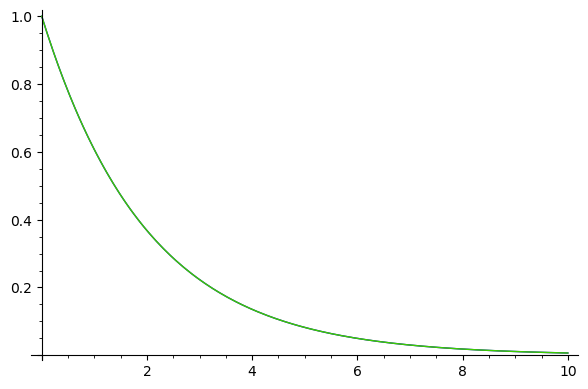

In [78]:
plot([rec_R(t), R(t)],(t, 0, 10))

Частное решение

$\beta_{0} = 1$; $\beta_{1} = \frac{5}{3}$; $\alpha_{0} = \frac{8}{3}$

4. $\alpha_{0} = 2 \cdot \frac{4}{3} \beta_{0}$,

$-\frac{20}{3^2} \beta_{1} = 0$

$\frac{100}{3^3}\beta_{0}-\frac{20}{3^2}\beta_{1} = 0$

5. $F\left(S\right) = \frac{\left(1-\delta\right) F\left(\delta\right)}{2 \alpha} = \frac{1 - \frac{S-1}{S+3}}{4} \cdot \frac {\frac{8}{3}}{\frac{5}{3}\left(\frac{S-1}{S+3}\right)+1} = \frac{2}{2 S + 1}$

6. $F\left(j\,\omega \right) = \frac{2}{2 j \omega + 1} = \frac{2-4 j \omega}{1 + 4 \omega^2}$;

$S\left(\omega\right) = 2\,Re\,F\left(j\omega\right) = \frac{4}{1+4\omega^2}$.

Найдя непосредственно $S(\omega)$ для $R\left(\tau\right) = e^{-0.5 \left|\tau\right|}$ (см. приложение 1) получим тот же результат

Важным вопросом при определении спектральной плотности $S(\omega)$ является оценка погрешности такого определения. Примем за погрешность определения спектральной плотности относительную среднеквадратичную погрешность аппроксимации корреляционной функции $R(\tau)$

$\delta = \frac{\int_{0}^{T}\left(R\left(\tau\right)-R^{'}\left(\tau\right)\right)^2 d\tau}{\int_{0}^{T}R^2\left(\tau\right) d\tau}$ (1.47)

где $R^{'}(\tau)$ – корреляционная функция, полученная в результате обратного преобразования Лапласа;

T – время наблюдения корреляционной функции.

На величину относительной среднеквадратичной погрешности $\delta$ существенное влияние оказывает погрешность задания исходных данных, определения корреляционной функции $R(\tau)$ исходного случайного процесса и значения параметров обобщенных функций Чебышева – Лагерра. Величина погрешности $\delta$ зависит также от длительности реализации случайного процесса и по дискретизации по времени.
Анализ погрешности $\delta$  в общем виде представляет собой довольно сложную задачу из-за многовариационного характера зависимости погрешности $\delta$ от её составляющих.


Наличие в функциях ${l}_{n}^{\alpha, \beta}\left(t\right)$ параметров $\alpha$ и $\beta$ позволяет при прочих равных условиях путём их изменений минимизировать величину погрешности $\delta$ при определении спектральной плотности. Будем называть значения этих параметров оптимальными, если они обеспечивают при прочих равных условиях минимум величины погрешности $\delta$ .
При реализации метода определения спектральной плотности на ЭВМ можно рекомендовать следующий способ определения значений параметров $\alpha$ и $\beta$ изменяющиеся с малым шагом.
Практика изменения разработанного метода определения спектральной плотности показала, что относительная среднеквадратичная погрешность $\delta$  для типовых корреляционных функций $R(\tau)$ при табличном вводе исходного случайного процесса и оптимальных значений параметров $\alpha$ и $\beta$ не превышает величины 10 %, что представляется вполне допустимым при практическом  использовании метода. Указанная величина погрешности в основном определяется погрешностью задания исходных данных и определения корреляционной функции случайного процесса.